## Classification

In the previous course, we explored a supervised machine learning technique called linear regression. Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains discrete values, then linear regression isn't a good fit.

In this mission, we'll explore how to build a predictive model for these types of problems, which are known as **`classification`** problems. In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. 

## Introduction to the data

* gre - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
    - Score ranges from 200 to 800.
* gpa - college grade point average.
    - Continuous between 0.0 and 4.0.
* admit - binary value
    - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
admissions = pd.read_csv('admissions.csv')

admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


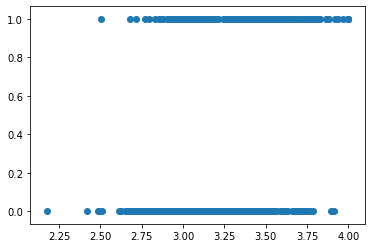

In [6]:
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

## Logistic regression

In the previous scatter plot, you'll notice that the `gpa` column and the `admit` column do not have a clear linear relationship. Recall that the admit column only contains the values `0` and `1` and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical values**. Classification focuses on estimating the relationship between the independent variables and the dependent, **categorical variable**.

In this mission, we'll focus on a classification technique called **logistic regression**. While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to `1` or `0` otherwise.

This threshold probability is something we select, and we'll learn about how to select a good threshold probability in later missions. For now, let's dive more into how logistic regression works.

## Logistic function

 In logistic regression, we use the **logistic function**, which is a version of the linear function that is adapted for classification.
 
 Here's the mathematical representation of the logistic function:
 
$\sigma(t)=\dfrac{e^t}{1+e^t}$

The logistic function is broken up into 2 key parts:

The exponential transformation, transforming all values to be positive:
${e^t}$

The normalization transformation, transforming all values to range between 0 and 1:

$\dfrac{t}{1+t}$

The exponential transformation and the normalization forces the output values to be squeezed between `0` and `1`. If you plot just the exponential part, the output values won't be limited to the range of `0` to `1`:

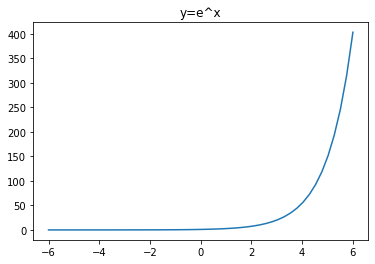

In [9]:
x = np.linspace(-6,6,50, dtype=float)
y = np.exp(x)

plt.plot(x, y)
plt.title("y=e^x")
plt.show()

The normalization part alone unfortunately isn't sufficient since it struggles at constraining negative values:

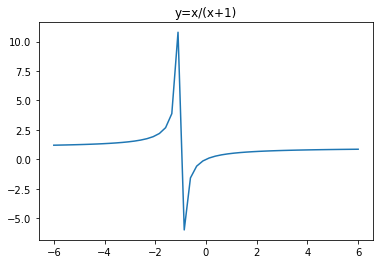

In [11]:
x = np.linspace(-6,6,50, dtype=float)
y = x/(x+1)

plt.plot(x, y)
plt.title("y=x/(x+1)")
plt.show()

Together, both of these pieces work well to constrain the output to the range of values that probabilities are in. 

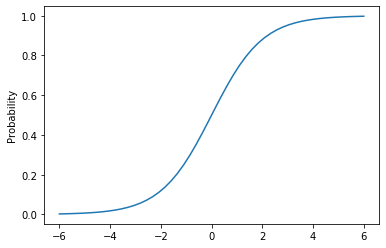

In [12]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

## Training a logistic regression model

In [15]:
admissions['gpa'].describe()

count    644.000000
mean       3.239936
std        0.291907
min        2.177100
25%        3.045036
50%        3.234650
75%        3.448415
max        4.000000
Name: gpa, dtype: float64

In [14]:
admissions['admit'].value_counts(normalize=True)

0    0.621118
1    0.378882
Name: admit, dtype: float64

In [27]:
logistic_model = LogisticRegression()

logistic_model.fit(admissions[["gpa"]], admissions["admit"])

preds = logistic_model.predict(admissions[["gpa"]])

accuracy_score(admissions['admit'], preds)

0.6847826086956522

## Plotting probabilities

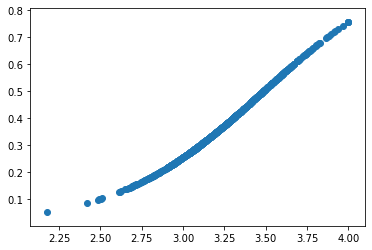

In [31]:
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])

plt.scatter(admissions['gpa'], pred_probs[:, 1])
plt.show()

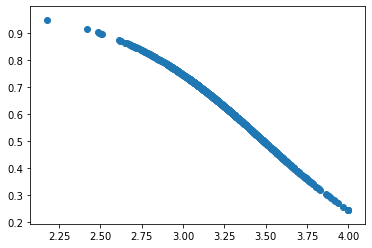

In [30]:
plt.scatter(admissions['gpa'], pred_probs[:, 0])
plt.show()

## Predict labels

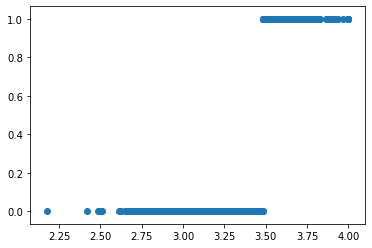

In [32]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

fitted_labels = logistic_model.predict(admissions[["gpa"]])

plt.scatter(admissions['gpa'], fitted_labels)
plt.show()